In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [5]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [14]:
df["FUEL"] = df["FUEL"].astype("category")
df["FUEL"] = df["FUEL"].cat.codes
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1


In [15]:
col = df.columns
col

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [20]:
sd = StandardScaler()
df[['DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',]] = sd.fit_transform(df[['DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']])

In [22]:
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,-1.643168,-0.046442,-1.472885,2.072201,0
1,1,0,-1.643168,-0.046442,-1.472885,1.928925,1
2,1,0,-1.643168,-0.046442,-0.923903,1.833407,1
3,1,0,-1.643168,-0.046442,-0.797214,1.737890,1
4,1,0,-1.643168,1.545942,-0.522723,1.690131,1


In [23]:
x = df.iloc[:,:-1].values.tolist()

In [ ]:
o = df.iloc[:,-1].values.tolist()
o

In [30]:
n1 = len(x[0])
n2 = 3
h = []
y = []
lr = 0.3

In [31]:
for i in range(n2):
  h.append(int(input(f"Enter the no. of nodes in hidden layer {i+1}: ")))

Enter the no. of nodes in hidden layer 1: 5
Enter the no. of nodes in hidden layer 2: 4
Enter the no. of nodes in hidden layer 3: 3


In [45]:
b = []

for i in range(n2):
  b.append([])
  for j in range(h[i]):
    b[-1].append(round(random.random(),3))

b.append([])
for i in range(1):
  b[-1].append(round(random.random(),3))

In [46]:
w = []
for i in range(1):
  w.append([])
  for j in range(n1):
    w[-1].append([])
    for k in range(h[i]):
      w[-1][-1].append(round(random.random(),3))


for i in range(1,n2):
  w.append([])
  for j in range(h[i-1]):
    w[-1].append([])
    for k in range(h[i]):
      w[-1][-1].append(round(random.random(),3))

for i in range(1):
  w.append([])
  for j in range(h[-1]):
    w[-1].append([])
    for k in range(1):
      w[-1][-1].append(round(random.random(),3))


In [41]:
def activationFunction(x):
  return 1/(math.exp(-x))

In [42]:
def dActivationFunction(x):
  return 1 * activationFunction(x) * (1 - activationFunction(x))

In [53]:
e = 5
def feedForward():
  Y = []
  for i in range(1):                   #epochs
    for j in range(len(x)):            #inputs
      Y.append([])
      tx = x[j]
      for k in range(1):               #input layers
          Y[-1].append([])
          for l in range(h[0]):          #next node
              tw = []
              for m in range(n1):          #previous node
                  tw.append(w[k][m][l])
              yin = np.dot(tx, tw) + b[k][l]
              Y[-1][-1].append(yin)


      for k in range(1,n2):              #hidden layers
          Y[-1].append([])
          for l in range(h[k]):          #each nodes
              tw = []
              for m in range(h[k-1]):
                  tw.append(w[k][m][l])
              yin = np.dot(Y[-1][-2], tw) + b[k][l]
              Y[-1][-1].append(yin)

      for k in range(1):              #output layers
          Y[-1].append([])
          for l in range(1):          #each nodes
              tw = []
              for m in range(h[-1]):
                  tw.append(w[k][m][l])
              yin = np.dot(Y[-1][-2], tw) + b[-1][-1]
              Y[-1][-1].append(activationFunction(yin))

  return Y[-1]


In [37]:
def BackPropagation(t):
  delK = (t[-1][-1] - o[j])*dActivationFunction(x)





In [54]:
y = feedForward()

In [55]:
print(accuracy_score(y,o))

ValueError: ignored

<Axes: >

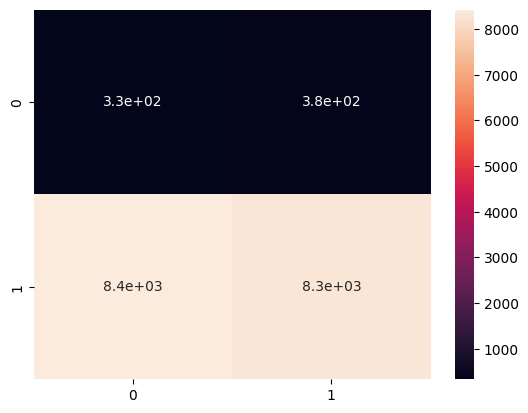

In [40]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y,o)

import seaborn as sns
sns.heatmap(cm, annot = True)